# TODO
* Try with short trail days

In [1]:
import os
import pandas as pd
# from functools import partial
# import fastparquet
import datashader as ds
import datashader.transfer_functions as tf
# from datashader.utils import export_image
from datashader.colors import viridis, #Sets1to3, 
# from colorcet import fire
# from matplotlib.cm import hot
import numpy as np
import dask.dataframe as dd
# import holoviews.operation.datashader as hd

from dask.diagnostics import ProgressBar
ProgressBar().register()

from sklearn.externals.joblib import Memory
memory = Memory(location='/tmp', verbose=0)

In [2]:
def spread(pts):
    return ((pts[0][1] - pts[0][0]),
            (pts[1][1] - pts[1][0]))
def ratio(pts):
    s = spread(pts)
    x, y = s
    return x / y

In [3]:
%%time
parq_file = '/users/lukestarnes/Documents/adsb/2018.parq'
# parq_file = r'L:\Starnes_Luke\dev\2018.parq'
ddf = dd.read_parquet(parq_file)

CPU times: user 22.3 ms, sys: 7.79 ms, total: 30.1 ms
Wall time: 81.2 ms


In [32]:
MaxBounds = ((-20048966.10, 20048966.10), (-20026376.39, 20026376.39))
WholeWorld = ((-20_037_508, 20_037_508), (-7_670_608, 13_971_466))
TwoBounds = ((-20_000_000, 20_000_000), (-20_000_000, 20_000_000))
USA_CONUS = ((-13884029, -7453304), (2698291, 6455972))
WesternEuro = ((-1181114, 4270391), (3000000, 8081620))
Germany = ((709336, 1600000), (6026907, 7270000))
Chicago = (( -9828281, -9717659), (5096658, 5161298))
Chinatown = (( -9759210, -9754583), (5137122, 5139825))
NewYorkCity = (( -8280656, -8175066), (4940514, 4998954))
LosAngeles = ((-13195052, -13114944), (3979242, 4023720))
Houston = ((-10692703, -10539441), (3432521, 3517616))
Austin = ((-10898752, -10855820), (3525750, 3550837))
NewOrleans = ((-10059963, -10006348), (3480787, 3510555))
Atlanta = ((-9507853,-9274873), (3927030, 4069506))

In [33]:
@memory.cache
def create_image(x_range, y_range, plot_weight, thresh=None):
    cmap=viridis
#     color_key=Sets1to3 # NEEDED?
    r = ratio((x_range, y_range))
    plot_height = int(plot_weight / r)
    cvs = ds.Canvas(plot_weight, plot_height, x_range, y_range)
    agg = cvs.points(ddf, 'x', 'y')
    if thresh is not None:
        img = tf.shade(agg.where(agg > thresh), cmap = cmap)#, color_key=color_key)
    else:
        img = tf.shade(agg, cmap = cmap)#, color_key=color_key)
    return tf.set_background(img, 'black')

[########################################] | 100% Completed | 16.5s
[########################################] | 100% Completed |  3min  4.1s


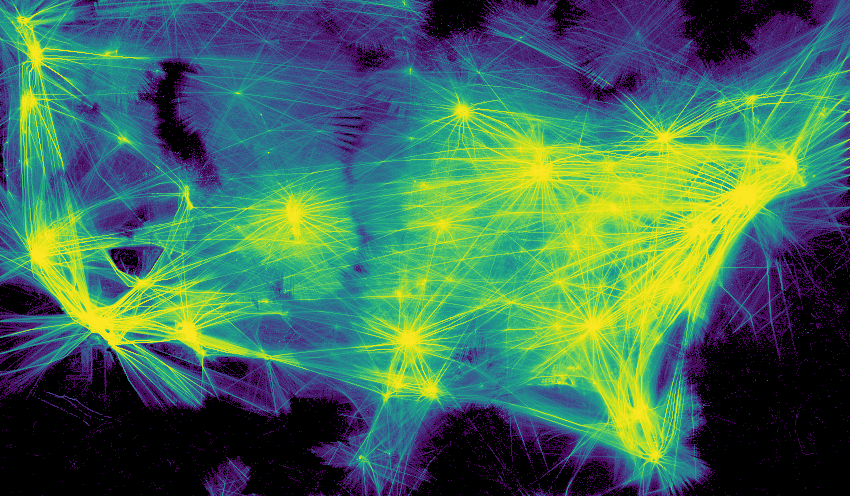

In [22]:
create_image(*USA_CONUS, 850)

[########################################] | 100% Completed | 16.8s
[########################################] | 100% Completed |  2min 12.6s


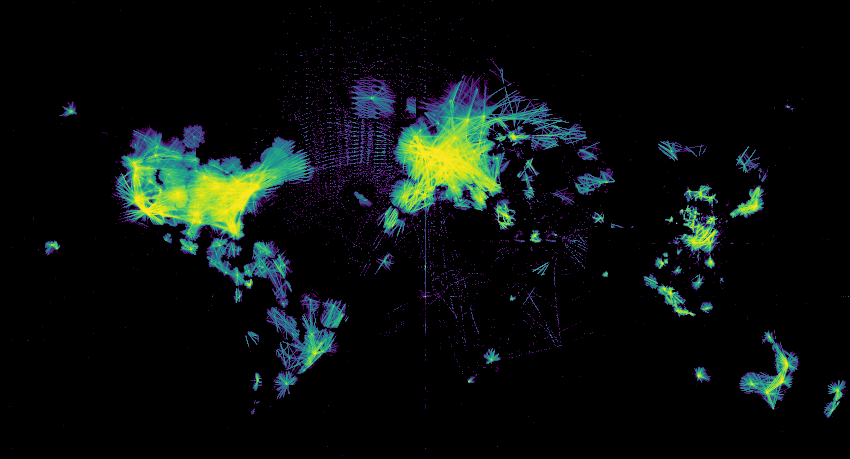

In [35]:
create_image(*WholeWorld, 850, thresh=20)